In [4]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
book_1 = pd.read_csv('book1.csv')
book_1['book'] = 1
book_1['weight_inv'] = 1/book_1.weight
print(book_1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  weight_inv  
0     1    0.333333  
1     1    0.166667  
2     1    0.200000  
3     1    0.250000  
4     1    0.250000  


In [15]:
book_2 = pd.read_csv('book2.csv')
book_2['book'] = 2
book_2['weight_inv'] = 1/book_2.weight

book_3 = pd.read_csv('book3.csv')
book_3['book'] = 3
book_3['weight_inv'] = 1/book_2.weight

book_4 = pd.read_csv('book4.csv')
book_4['book'] = 4
book_4['weight_inv'] = 1/book_2.weight

book_5 = pd.read_csv('book5.csv')
book_5['book'] = 5
book_5['weight_inv'] = 1/book_2.weight

In [17]:
books = pd.concat([book_1, book_2, book_3, book_4, book_5])
books.head()

,Source,Target,Type,weight,book,weight_inv
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1,0.333333
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1,0.166667
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1,0.200000
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1,0.250000
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1,0.250000


In [18]:
graphs = [nx.(
          books[books.book==i],
          source='Source', target='Target',
          edge_attr=['weight', 'weight_inv'])
          for i in range(1, 6)]

### Finding the most important node i.e character in these networks.

In [23]:
deg_cen_book1 = nx.(graphs[0])

sorted(deg_cen_book1.items(),
       key=lambda x:x[1],
       reverse=True)[0:5]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572)]

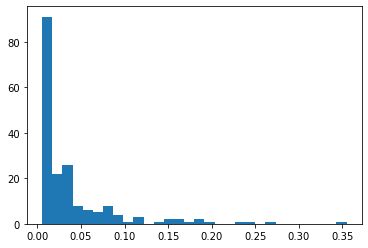

In [25]:
plt.hist(deg_cen_book1.values(), bins=30)
plt.show()

* A high portion of characters aren't connected to lot of other characters while some characters are highly connected all through the network.

In [24]:
deg_cen_book5 = nx.degree_centrality(graphs[4])
sorted(deg_cen_book5.items(),
       key=lambda x:x[1],
       reverse=True)[0:5]

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544)]

### Find nodes which are important in the network. 

#### First check unweighted (just the structure)

In [28]:
sorted(nx.(graphs[0]).items(),
       key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

#### Let's care about interactions now

In [29]:
sorted(nx.betweenness_centrality(graphs[0],
       weight='').items(),
       key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.5926474861958733),
 ('Catelyn-Stark', 0.36855565242662014),
 ('Jon-Snow', 0.3514094739901191),
 ('Robert-Baratheon', 0.3329991281604185),
 ('Tyrion-Lannister', 0.27137460040685846),
 ('Daenerys-Targaryen', 0.202615518744551),
 ('Bran-Stark', 0.0945655332752107),
 ('Robb-Stark', 0.09177564661435629),
 ('Arya-Stark', 0.06939843068875327),
 ('Sansa-Stark', 0.06870095902353966)]

### Evolution of importance of characters over the books

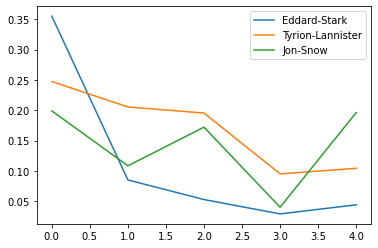

In [32]:
evol = [nx.degree_centrality(graph)
        for graph in graphs]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['Eddard-Stark',
         'Tyrion-Lannister',
         'Jon-Snow']].plot()
plt.show()

In [33]:
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(
        evol_df.T[i].sort_values(
            ascending=False)[0:5].index))
set_of_char

{'Arya-Stark',
 'Brienne-of-Tarth',
 'Catelyn-Stark',
 'Cersei-Lannister',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Jon-Snow',
 'Margaery-Tyrell',
 'Robb-Stark',
 'Robert-Baratheon',
 'Sansa-Stark',
 'Stannis-Baratheon',
 'Theon-Greyjoy',
 'Tyrion-Lannister'}